# Symptoms Data Classification

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing csv
df = pd.read_csv('/Users/omkarsalokhe/Documents/Research_Lab/symptoms_data.csv')
df.head()

,Age,Fever,Fatigue,Cough,Body_Ache,Sore_Throat,Breathing_Difficulties,Infected
0,94,98.603205,1,0,1,1,0,1
1,1,102.519485,0,1,1,0,2,1
2,65,101.799096,1,1,1,2,1,1
3,28,103.863706,0,1,0,1,2,0
4,75,102.155484,1,0,0,0,0,0


## Standardising Data

In [ ]:
#variables
FEVER_NO = 98.0
FEVER_LOW = 99.0
FEVER_MID = 100.1
FEVER_HIGH = 103.1
FEVER_VERY_HIGH = 105.0


#function to map Fever to Ordinal Values
def map_fever_category(fever):
    if FEVER_NO <= fever < FEVER_LOW:
        return 0
    elif FEVER_LOW <= fever < FEVER_MID:
        return 1
    elif FEVER_MID <= fever < FEVER_HIGH:
        return 2
    elif FEVER_HIGH <= fever <= FEVER_VERY_HIGH:
        return 3
    else:
        raise ValueError(f"Fever value {fever} is outside the expected range of [{FEVER_LOW}, {FEVER_VERY_HIGH}].")

#function to map Age to Ordinal Values
def map_age_category(age):
    if age < 21:
        return 0
    elif 21 <= age < 41:
        return 1
    elif 41 <= age < 61:
        return 2
    elif age >= 61:
        return 3
    else:
        raise ValueError(f"Age value {age} is outside the expected range.")

# create new column by applying the mapping function to the 'Fever' column
df['Fever'] = df['Fever'].apply(map_fever_category)

# create new column by applying the mapping function to the 'Age' column
df['Age'] = df['Age'].apply(map_age_category)

# print the head of the DataFrame
df.head()

,Age,Fever,Fatigue,Cough,Body_Ache,Sore_Throat,Breathing_Difficulties,Infected
0,3,0,1,0,1,1,0,1
1,0,2,0,1,1,0,2,1
2,3,2,1,1,1,2,1,1
3,1,3,0,1,0,1,2,0
4,3,2,1,0,0,0,0,0


### Dataframe Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4000 non-null   int64
 1   Fever                   4000 non-null   int64
 2   Fatigue                 4000 non-null   int64
 3   Cough                   4000 non-null   int64
 4   Body_Ache               4000 non-null   int64
 5   Sore_Throat             4000 non-null   int64
 6   Breathing_Difficulties  4000 non-null   int64
 7   Infected                4000 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


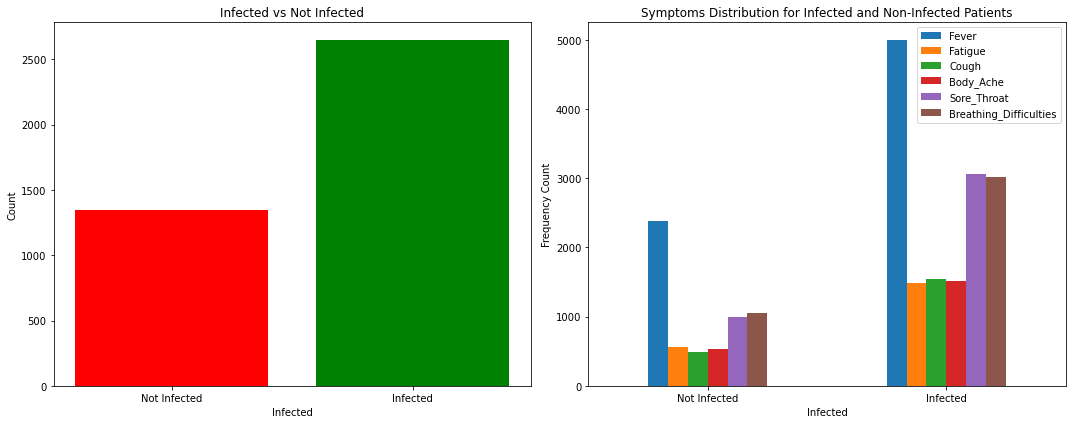

In [ ]:
# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

# count the number of infected and not infected cases
infected_counts = df['Infected'].value_counts()

# set the colors for the bars
colors = ['green', 'red']

# create a bar plot
axs[0].bar(infected_counts.index, infected_counts.values, color=colors)

# set the title and labels
axs[0].set_title('Infected vs Not Infected')
axs[0].set_xlabel('Infected')
axs[0].set_ylabel('Count')

# set the tick labels
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Not Infected', 'Infected'])

# group data by infected column
temp_df = df.drop('Age', axis=1)
grouped_data = temp_df.groupby('Infected').sum()

# plot grouped bar charts
grouped_data.plot(kind='bar', ax=axs[1])
axs[1].set_title('Symptoms Distribution for Infected and Non-Infected Patients')
axs[1].set_xlabel('Infected')
axs[1].set_ylabel('Frequency Count')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Not Infected', 'Infected'], rotation=0)
axs[1].legend(loc='best')

# adjust the layout to prevent overlapping of the legend
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
# Total number of Infected vs Non-infected Data
infected_counts = df['Infected'].value_counts()

print("Infected Rows: ", infected_counts[1])
print("\nNon-Infected Rows: ", infected_counts[0])

Infected Rows:  2651

Non-Infected Rows:  1349


There is a data imbalance as the number of infected individuals (2651) is much larger than the number of non-infected individuals (1349). This kind of data imbalance is common in many real-world datasets and can lead to biased machine learning models. <br><br>
<b>Methods to remove data imbalance</b>
<ol>
<li><b>Undersampling:</b> This involves reducing the size of the majority class (in this case, the infected individuals) to match the size of the minority class (in this case, the non-infected individuals). This can be done randomly or using more sophisticated techniques such as Tomek links or Edited Nearest Neighbors.</li>

<li><b>Oversampling:</b> This involves increasing the size of the minority class to match the size of the majority class. This can be done by duplicating existing samples or generating new synthetic samples using techniques such as SMOTE (Synthetic Minority Over-sampling Technique).</li>

<li><b>Cost-sensitive learning:</b> This involves modifying the machine learning algorithm to give more weight to the minority class during training.</li>
</ol>   

##### Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

# Separating input features and target variable
X = df.drop('Infected', axis=1)
y = df['Infected']

# Applying NearMiss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

# Counting number of infected and non-infected rows after undersampling
infected_counts = y_resampled.value_counts()

print("Infected Rows after undersampling:\n", infected_counts[1])
print("\nNon-Infected Rows after undersampling:\n", infected_counts[0])

Infected Rows after undersampling:
 1349

Non-Infected Rows after undersampling:
 1349


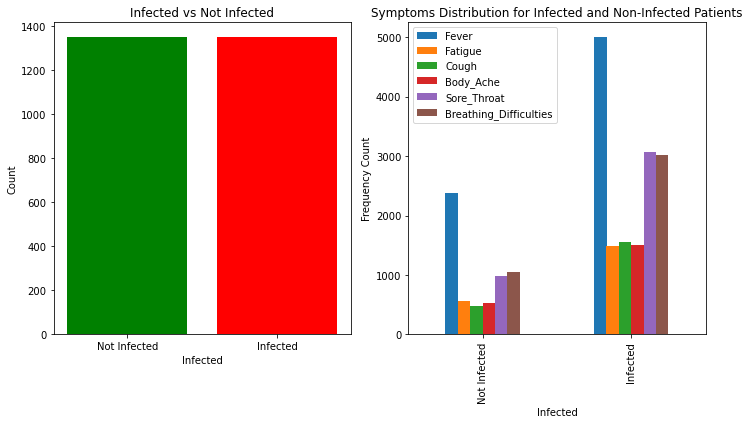

In [ ]:
# create the figure and axes objects
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
colors = ['green', 'red']
axs[0].bar(infected_counts.index, infected_counts.values, color=colors)
axs[0].set_title('Infected vs Not Infected')
axs[0].set_xlabel('Infected')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Not Infected', 'Infected'])

# plot the second graph
temp_df = df.drop('Age', axis=1)
grouped_data = temp_df.groupby('Infected').sum()
grouped_data.plot(kind='bar', ax=axs[1], figsize=(10, 6))
axs[1].set_title('Symptoms Distribution for Infected and Non-Infected Patients')
axs[1].set_xlabel('Infected')
axs[1].set_ylabel('Frequency Count')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Not Infected', 'Infected'])

# adjust the layout
plt.tight_layout()

# display the plot
plt.show()

##### Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Separating input features and target variable
X = df.drop('Infected', axis=1)
y = df['Infected']

# Applying SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

# Counting number of infected and non-infected rows after oversampling
infected_counts = y_resampled.value_counts()

print("Infected Rows after oversampling:\n", infected_counts[1])
print("\nNon-Infected Rows after oversampling:\n", infected_counts[0])

Infected Rows after oversampling:
 2651

Non-Infected Rows after oversampling:
 2651


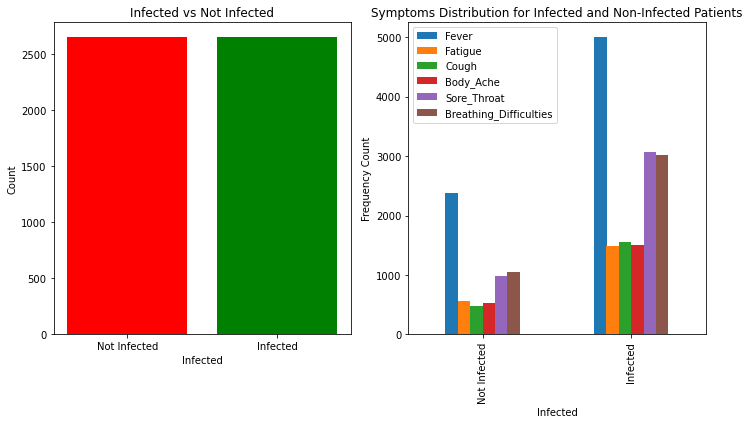

In [ ]:
# create the figure and axes objects
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
colors = ['green', 'red']
axs[0].bar(infected_counts.index, infected_counts.values, color=colors)
axs[0].set_title('Infected vs Not Infected')
axs[0].set_xlabel('Infected')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Not Infected', 'Infected'])

# plot the second graph
temp_df = df.drop('Age', axis=1)
grouped_data = temp_df.groupby('Infected').sum()
grouped_data.plot(kind='bar', ax=axs[1], figsize=(10, 6))
axs[1].set_title('Symptoms Distribution for Infected and Non-Infected Patients')
axs[1].set_xlabel('Infected')
axs[1].set_ylabel('Frequency Count')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Not Infected', 'Infected'])

# adjust the layout
plt.tight_layout()

# display the plot
plt.show()

##### Cost Sensitive Learning

In [ ]:
# Separating input features and target variable
X = df.drop('Infected', axis=1)
y = df['Infected']

# Calculating class weights using inverse frequency weighting
class_counts = np.bincount(y)
class_weights = {0: 1.0 / class_counts[0], 1: 1.0 / class_counts[1]}

# Printing class weights
print("Class weights:", class_weights)

Class weights: {0: 0.0007412898443291327, 1: 0.0003772161448509996}


## EDA

#### Symptoms Distribution for Infected and Non-Infected Patients

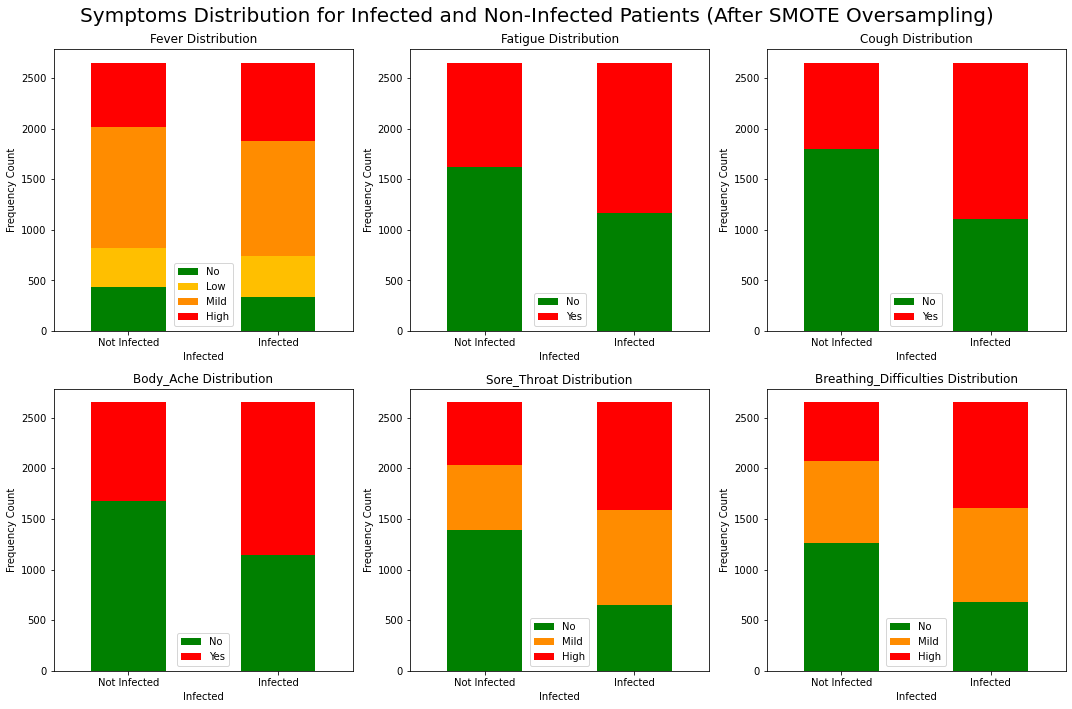

In [ ]:
# create temp_df by dropping 'Age' column
temp_df = pd.concat([X_resampled, y_resampled], axis=1).drop('Age', axis=1)

# set color scheme for each symptom
colors = {
    'Fever': ['#008000', '#ffbf00', '#ff8c00', '#ff0000'],
    'Fatigue': ['#008000', '#ff0000'],
    'Cough': ['#008000', '#ff0000'],
    'Body_Ache': ['#008000', '#ff0000'],
    'Sore_Throat': ['#008000', '#ff8c00', '#ff0000'],
    'Breathing_Difficulties': ['#008000', '#ff8c00', '#ff0000']
}

# set legend labels for each symptom
legend_labels = {
    'Fever': ['No', 'Low', 'Mild', 'High'],
    'Fatigue': ['No', 'Yes'],
    'Cough': ['No', 'Yes'],
    'Body_Ache': ['No', 'Yes'],
    'Sore_Throat': ['No', 'Mild', 'High'],
    'Breathing_Difficulties': ['No', 'Mild', 'High']
}

# plot stacked bar charts for each symptom
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, symptom in enumerate(temp_df.columns[:-1]):
    row = i // 3
    col = i % 3
    data = temp_df.groupby('Infected')[symptom].value_counts().unstack()
    data.plot(kind='bar', stacked=True, color=colors[symptom], ax=axs[row][col])
    axs[row][col].set_title(f'{symptom} Distribution')
    axs[row][col].set_xlabel('Infected')
    axs[row][col].set_ylabel('Frequency Count')
    axs[row][col].set_xticklabels(['Not Infected', 'Infected'],rotation=0)
    axs[row][col].legend(labels=legend_labels[symptom], loc='best')

fig.suptitle("Symptoms Distribution for Infected and Non-Infected Patients (After SMOTE Oversampling)", fontsize=20)
plt.tight_layout()
plt.show()

## Testing Classification Algorithms

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Fitting the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Generating the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       806
           1       0.81      0.78      0.80       785

    accuracy                           0.80      1591
   macro avg       0.80      0.80      0.80      1591
weighted avg       0.80      0.80      0.80      1591



<b>Precision:</b> The model correctly identified 80% of the actual negative cases and 80% of the actual positive cases.<br>
<b>Recall:</b> The model correctly identified 80% of the actual negative cases and 79% of the actual positive cases.<br>
<b>Accuracy:</b> The accuracy is the ratio of correct predictions to the total number of predictions. In this case, the accuracy of the model is 0.80 or 80%.<br>

Overall, the model has an <b>accuracy of 0.80</b>, which means it <b>correctly predicted 80% of the cases</b>. The precision, recall, and F1-score for both classes (infected and non-infected) are around 80%, indicating that the model is performing well on the balanced data. The macro avg and weighted avg scores are also around 80%, which is good.

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Get the predicted probabilities for the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Plot the table for the test data set with the actual value of infected and predicted probability of infected
results = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_pred_proba})
print(results.head())


      Actual  Predicted Probability
3659       1               0.649574
4112       0               0.494051
3801       1               0.722257
1862       1               0.926379
5290       0               0.272592


<b>The features that have the most significant impact on the predicted probability of infection.</b>

In [ ]:
# Get the coefficients of the logistic regression model
coef = log_reg.coef_[0]

# Get the absolute value of the coefficients
abs_coef = np.abs(coef)

# Get the names of the features
feature_names = X.columns

# Create a dataframe with the feature names and their absolute coefficients
df_coef = pd.DataFrame({'feature': feature_names, 'coef': abs_coef})

# Sort the dataframe by absolute coefficient in descending order
df_coef = df_coef.sort_values('coef', ascending=False)

# Print the top 5 features with the highest absolute coefficients
print(df_coef)


                  feature      coef
3                   Cough  1.561872
4               Body_Ache  1.353021
2                 Fatigue  1.243916
5             Sore_Throat  0.985862
0                     Age  0.917364
6  Breathing_Difficulties  0.887067
1                   Fever  0.204100


<b>Testing the model for</b><br>
Age: 21 - 41<br>
Fever: High<br>
Fatigue: Yes<br>
Cough: Yes<br>
Body_Ache: No
Sore_Throat: Yes<br>
Breathing_Difficulties: Moderate

In [ ]:
# create a new DataFrame with the input values
input_data = pd.DataFrame([[1, 3, 1, 1, 0, 1, 1]], columns=df.columns[:-1])

# use the trained model to predict the probability of infection
predicted_probabilities = log_reg.predict_proba(input_data)
predicted_probabilities = predicted_probabilities[0][1]
print('The predicted probability of being infected is: %.2f%%' % (predicted_probabilities * 100))

The predicted probability of being infected is: 66.50%


<b> Checking the ROC of Model</b>

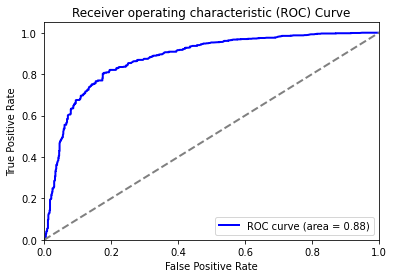

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Creating a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf.predict(X_test)

# Generating the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       806
           1       0.82      0.80      0.81       785

    accuracy                           0.82      1591
   macro avg       0.82      0.82      0.82      1591
weighted avg       0.82      0.82      0.82      1591



<b>Precision:</b> The model correctly identified 83% of the actual negative cases and 83% of the actual positive cases.<br>
<b>Recall:</b> The model correctly identified 82% of the actual negative cases and 82% of the actual positive cases.<br>
<b>Accuracy:</b> The accuracy is the ratio of correct predictions to the total number of predictions. In this case, the accuracy of the model is 0.83 or 83%.<br>

Overall, the model has an <b>accuracy of 0.83</b>, which means it <b>correctly predicted 83% of the cases</b>. The precision, recall, and F1-score for both classes (infected and non-infected) are around 83%, indicating that the model is performing well on the balanced data. The macro avg and weighted avg scores are also around 83%, which is good.

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Get the predicted probabilities for the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Plot the table for the test data set with the actual value of infected and predicted probability of infected
results = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_pred_proba})
print(results.head())

      Actual  Predicted Probability
3659       1               0.462107
4112       0               0.602875
3801       1               0.930000
1862       1               0.996667
5290       0               0.000000


<b>Testing the model for</b><br>
Age: 21 - 41<br>
Fever: High<br>
Fatigue: Yes<br>
Cough: No<br>
Body_Ache: No
Sore_Throat: Moderate<br>
Breathing_Difficulties: No

In [ ]:
input_data = [[1, 3, 1, 0, 0, 1, 0]]
input_df = pd.DataFrame(input_data, columns=['Age', 'Fever', 'Fatigue', 'Cough', 'Body_Ache', 'Sore_Throat', 'Breathing_Difficulties'])

predicted_probabilities = rf.predict_proba(input_df)[:,1]

print('The predicted probability of being infected is: %.2f%%' % (predicted_probabilities * 100))

The predicted probability of being infected is: 27.35%


<b> Checking the ROC of the Model </b>

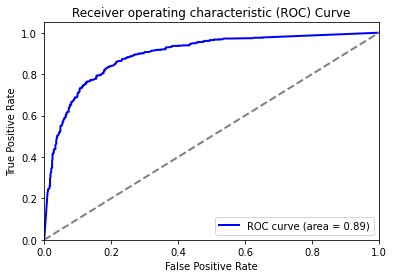

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Neural Networks

In [ ]:
# import tensorflow as tf
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Creating a neural network model
# nn_model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compiling the model
# nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Fitting the model on the training data
# nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# # Predicting on the test data
# y_pred = model.predict(X_test)

# # Generating the classification report
# y_pred_classes = (y_pred > 0.5).astype(int)
# print(classification_report(y_test, y_pred_classes))